In [1]:
import pandas as pd

# Lecture du fichier CSV
df = pd.read_csv('../data/transformer_data.csv')


In [3]:
df

,equipmentId,dateTime,load,hotspotTemperature
0,50033827,2023-04-30T22:00:00,12294.37,41.02
1,50033827,2023-04-30T22:15:00,12115.62,41.38
2,50033827,2023-04-30T22:30:00,11374.81,41.38
3,50033827,2023-04-30T22:45:00,10417.08,40.78
4,50033827,2023-04-30T23:00:00,10130.00,40.50
...,...,...,...,...
1093503,50249457,2025-02-28T21:45:00,12099.23,NaN
1093504,50249457,2025-02-28T22:00:00,11592.00,NaN
1093505,50249457,2025-02-28T22:15:00,11320.73,NaN
1093506,50249457,2025-02-28T22:30:00,11050.42,NaN


In [2]:
# Filtrer pour un seul équipement
equipement_unique = df['equipmentId'].unique()[0]  # Prend le premier équipement
df_filtre = df[df['equipmentId'] == equipement_unique]

print(f"Analyse pour l'équipement: {equipement_unique}")
print(f"Nombre d'observations: {len(df_filtre)}")


Analyse pour l'équipement: 50033827
Nombre d'observations: 64324


In [3]:
# Lecture du fichier météo
df_meteo = pd.read_csv('../data/weather_data.csv')
df_tfinfo = pd.read_csv('../data/transformers_info_data.csv')

df_meteo.head()



,dateTime,locationId,temperature,windSpeed,relativeHumidityPercentage
0,2023-04-30 22:00:00,2,13.920,2.430,62.840
1,2023-04-30 22:15:00,2,13.855,2.395,62.845
2,2023-04-30 22:30:00,2,13.790,2.360,62.850
3,2023-04-30 22:45:00,2,13.725,2.325,62.855
4,2023-04-30 23:00:00,2,13.660,2.290,62.860


In [10]:
df_tfinfo.head()

,equipmentId,nominalLoad,locationId,coolingType,manufactureYear,commissioningDate,enclosure,heatRunTest_noLoadLosses,heatRunTest_copperLosses,heatRunTest_ambiantTemperature,heatRunTest_deltaTopOil,heatRunTest_deltaHotspot,heatRunTest_x,heatRunTest_y,heatRunTest_h,heatRunTest_gradient
0,50033827,40.0,26,ONAF1,2008,2010-03-17T00:00:00,1 wall,16.37,186.51,25.4,54.1,67.4,0.73,1.48,1.13,11.8
1,50282127,40.0,11,ONAF1,2015,2015-08-07T00:00:00,no wall,15.51,149.18,22.7,46.8,62.8,0.72,1.32,1.16,13.8
2,50277055,40.0,19,ONAF1,2013,2014-08-08T00:00:00,2 walls,15.51,149.18,22.7,46.8,62.8,0.72,1.32,1.16,13.8
3,5004625,40.0,5,ONAF1,2001,2008-01-01T00:00:00,* no info,16.02,223.28,27.8,48.9,65.7,0.62,1.98,1.30,12.9
4,5004597,40.0,5,ONAF1,2001,2008-01-01T00:00:00,* no info,16.15,216.05,25.0,48.9,65.7,0.62,1.98,1.30,12.9


In [4]:
tfinfo = df_tfinfo[['equipmentId', 'locationId']]

# Convertir la colonne dateTime en datetime64[ns] dans les deux dataframes
df['dateTime'] = pd.to_datetime(df['dateTime'])
df_meteo['dateTime'] = pd.to_datetime(df_meteo['dateTime'])

first_df = pd.merge(df, tfinfo, on=('equipmentId'), how='left')
first_df = pd.merge(first_df, df_meteo, on=('locationId', 'dateTime'), how='left')

first_df.head()


,equipmentId,dateTime,load,hotspotTemperature,locationId,temperature,windSpeed,relativeHumidityPercentage
0,50033827,2023-04-30 22:00:00,12294.37,41.02,26,12.7700,2.2400,68.40
1,50033827,2023-04-30 22:15:00,12115.62,41.38,26,12.6425,2.1925,69.04
2,50033827,2023-04-30 22:30:00,11374.81,41.38,26,12.5150,2.1450,69.68
3,50033827,2023-04-30 22:45:00,10417.08,40.78,26,12.3875,2.0975,70.32
4,50033827,2023-04-30 23:00:00,10130.00,40.50,26,12.2600,2.0500,70.96


In [19]:
print("Taille avant suppression des NaN:", len(first_df))
first_df = first_df.dropna()
print("Taille après suppression des NaN:", len(first_df))

Taille avant suppression des NaN: 1093508
Taille après suppression des NaN: 997220


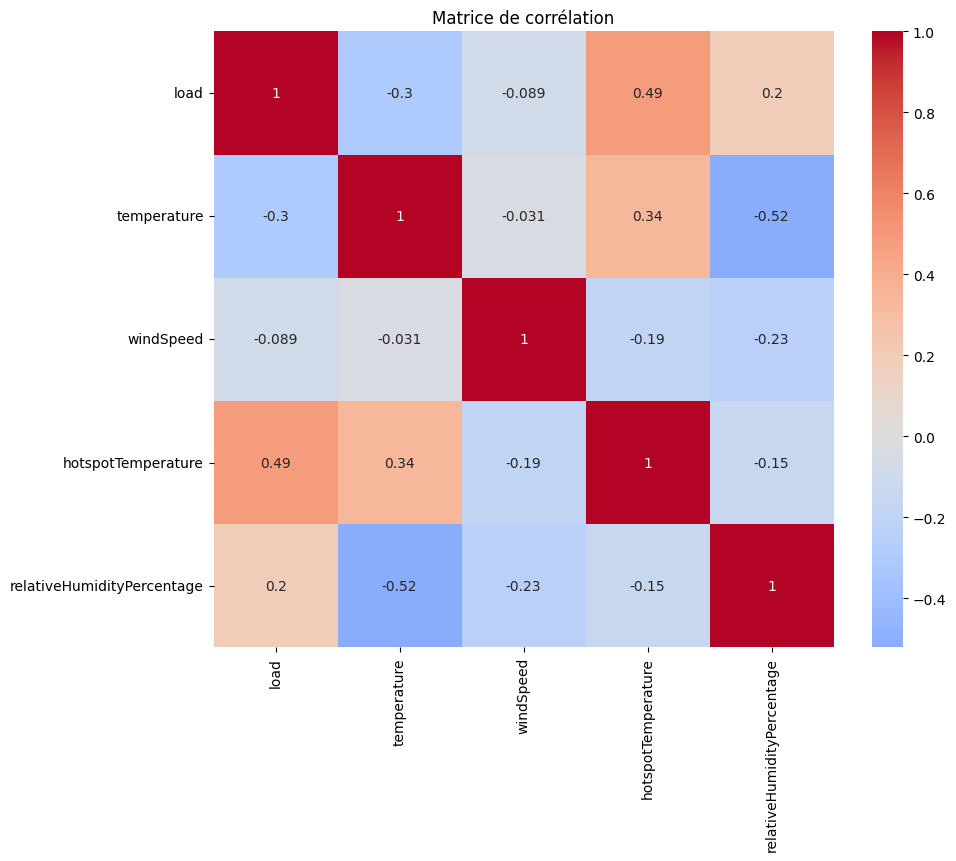

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df  = first_df[['load', 'temperature', 'windSpeed','hotspotTemperature','relativeHumidityPercentage']]
# Calculer et afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr('spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()


/var/folders/n9/q8bvx5ln4m10k1kwfc2w0zd40000gn/T/ipykernel_13337/3275428914.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])


Nombre d'observations: 64324


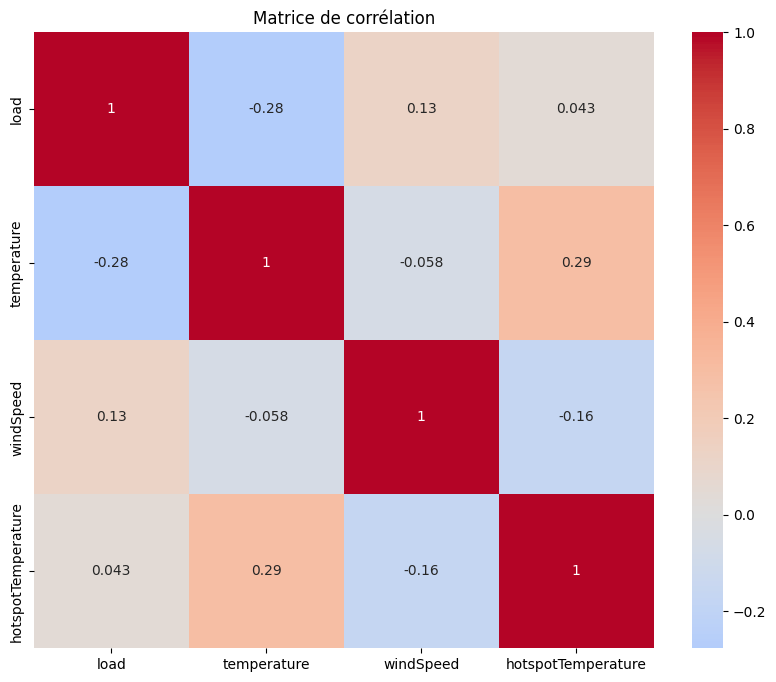

In [27]:
# Filtrer pour un seul équipement
equipement_unique = df['equipmentId'].unique()[0]  # Prend le premier équipement
df_filtre = df[df['equipmentId'] == equipement_unique]



# Filtrer pour un seul équipement
equipement_unique = 76075 
df_filtre = df[df['equipmentId'] == equipement_unique]


tfinfo = df_tfinfo[['equipmentId', 'locationId']]

# Convertir la colonne dateTime en datetime64[ns] dans les deux dataframes
df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])
df_meteo['dateTime'] = pd.to_datetime(df_meteo['dateTime'])

first_df = pd.merge(df_filtre, tfinfo, on=('equipmentId'), how='left')
first_df = pd.merge(first_df, df_meteo, on=('locationId', 'dateTime'), how='left')

first_df.head()

print(f"Nombre d'observations: {len(first_df)}")

import matplotlib.pyplot as plt
import seaborn as sns

corr_df  = first_df[['load', 'temperature', 'windSpeed','hotspotTemperature']]
# Calculer et afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr('spearman'), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()

In [49]:
def corr_equipment(equipement_unique):
        # Filtrer pour un seul équipement
    df_filtre = df[df['equipmentId'] == equipement_unique]
    df_filtre = df_filtre.dropna()

    tfinfo = df_tfinfo[['equipmentId', 'locationId']]

    # Convertir la colonne dateTime en datetime64[ns] dans les deux dataframes
    df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])
    df_meteo['dateTime'] = pd.to_datetime(df_meteo['dateTime'])

    first_df = pd.merge(df_filtre, tfinfo, on=('equipmentId'), how='left')
    first_df = pd.merge(first_df, df_meteo, on=('locationId', 'dateTime'), how='left')

    first_df.head()

    print(f"Nombre d'observations: {len(first_df)}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    corr_df  = first_df[['load', 'temperature', 'windSpeed','hotspotTemperature']]
    # Calculer et afficher la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_df.corr('spearman'), annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation')
    plt.show()

Nombre d'observations: 58660


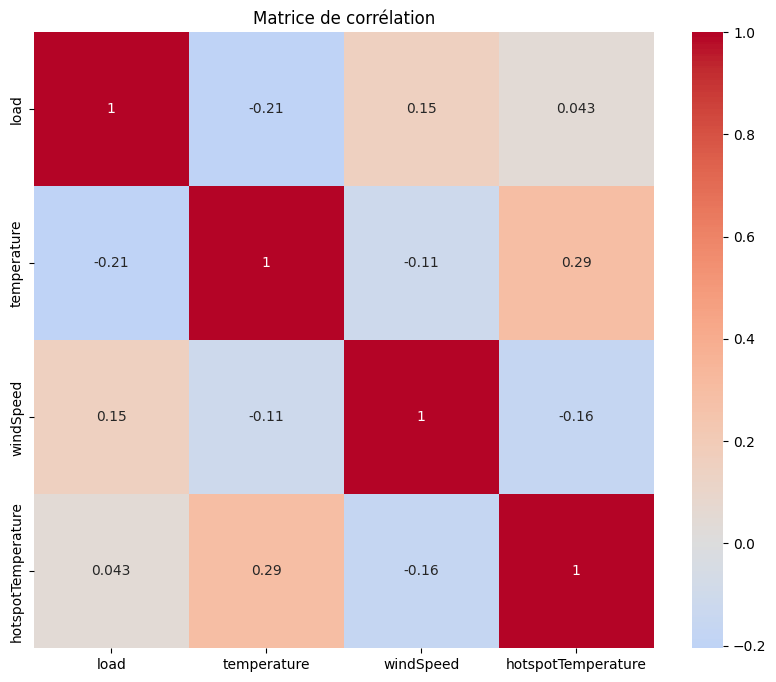

Nombre d'observations: 58660


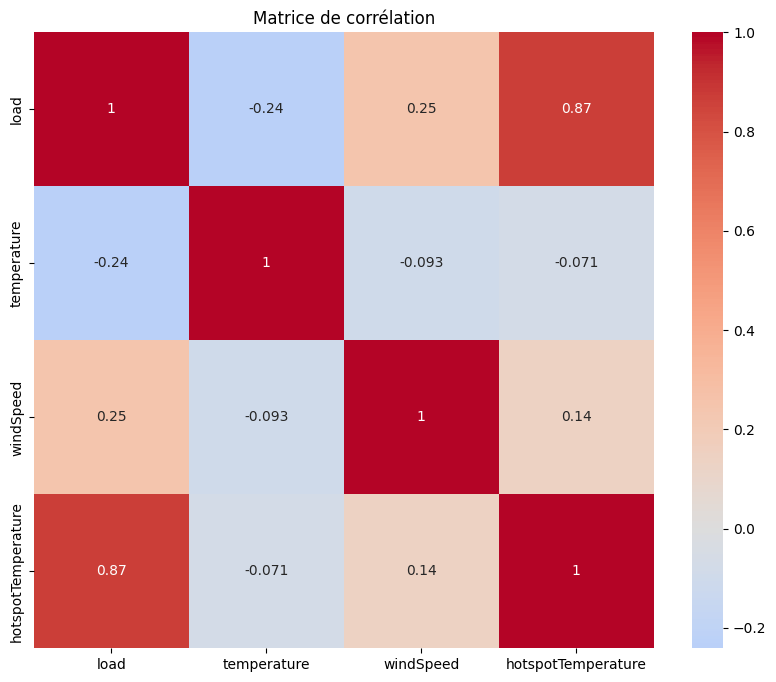

In [47]:
corr_equipment(76075)
corr_equipment(5030256)

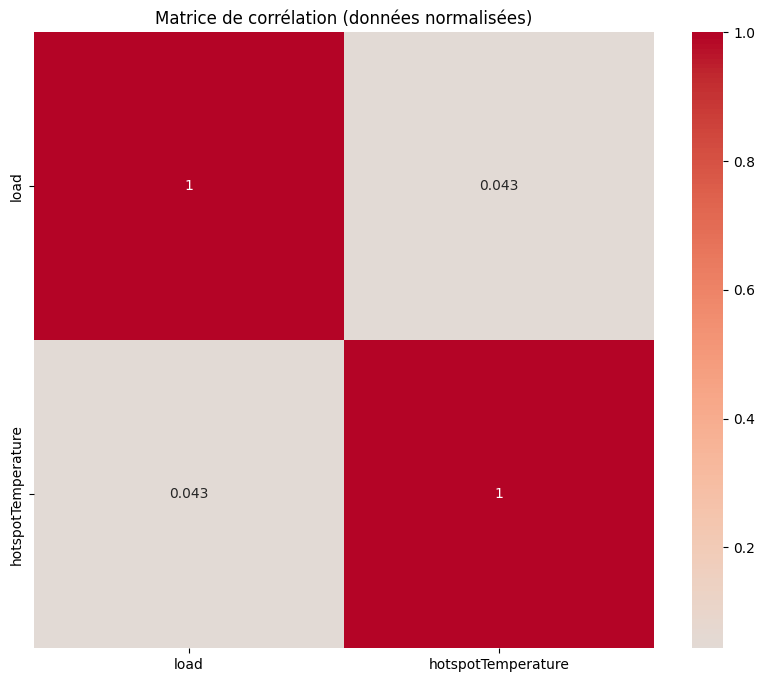

,equipmentId,dateTime,load,hotspotTemperature
643240,76075,2023-04-30 22:00:00,0.252164,0.000000
643241,76075,2023-04-30 22:15:00,0.248969,0.000000
643242,76075,2023-04-30 22:30:00,0.241702,0.000000
643243,76075,2023-04-30 22:45:00,0.237650,0.000000
643244,76075,2023-04-30 23:00:00,0.231897,0.000000
...,...,...,...,...
701895,76075,2024-12-31 21:45:00,0.403471,0.007705
701896,76075,2024-12-31 22:00:00,0.391624,0.007705
701897,76075,2024-12-31 22:15:00,0.381589,0.007705
701898,76075,2024-12-31 22:30:00,0.374532,0.007705


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Filtrer pour un seul équipement
equipement_unique = 76075 
df_filtre = df[df['equipmentId'] == equipement_unique]
df_filtre = df_filtre.dropna()

scaler = MinMaxScaler()
df_filtre_norm = df_filtre.copy()
df_filtre_norm[['load', 'hotspotTemperature']] = scaler.fit_transform(df_filtre_norm[['load', 'hotspotTemperature']])

# Calcul et affichage de la corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtre_norm[['load', 'hotspotTemperature']].corr('spearman'), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Matrice de corrélation (données normalisées)')
plt.show()

df_filtre_norm

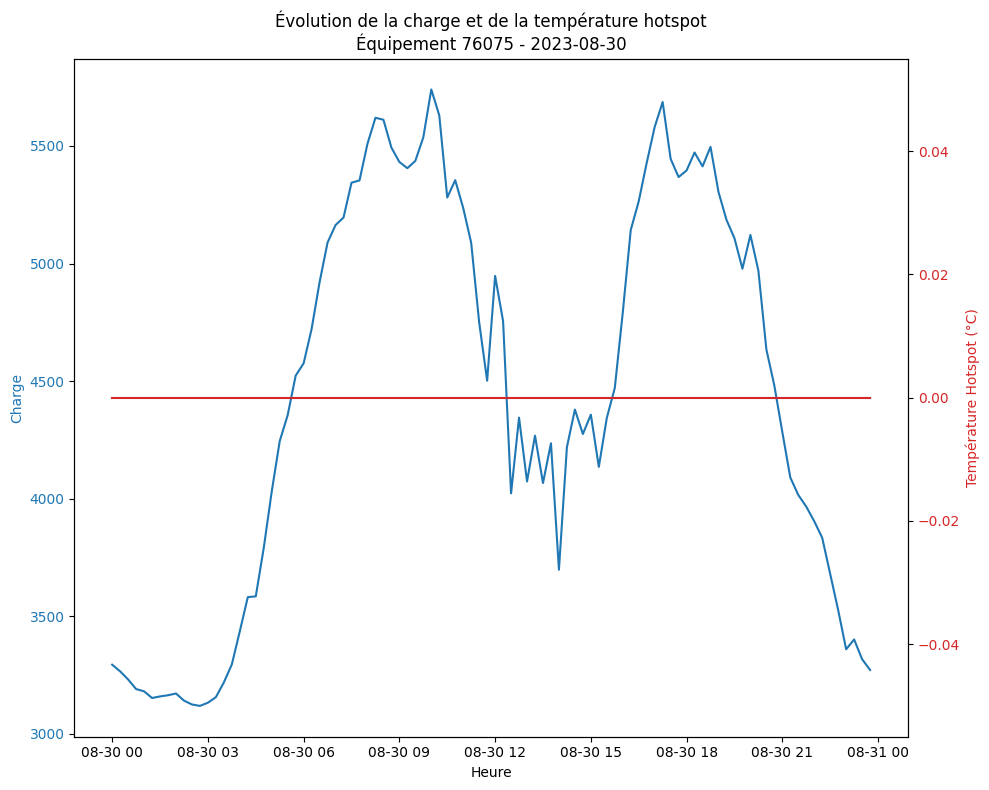

In [61]:
# Choisir un équipement et une journée spécifique
equipement = 76075
date = '2023-08-30'

df_filtre = df[df['equipmentId'] == equipement]
df_filtre = df_filtre.dropna()

# Convertir la colonne dateTime en datetime si ce n'est pas déjà fait
df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])

# Filtrer les données
df_jour = df_filtre[df_filtre['dateTime'].dt.strftime('%Y-%m-%d') == date]

# Créer une figure avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 8))

# Premier axe pour la charge
ax1.set_xlabel('Heure')
ax1.set_ylabel('Charge', color='tab:blue')
ax1.plot(df_jour['dateTime'], df_jour['load'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Deuxième axe pour la température hotspot
ax2 = ax1.twinx()
ax2.set_ylabel('Température Hotspot (°C)', color='tab:red')
ax2.plot(df_jour['dateTime'], df_jour['hotspotTemperature'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titre et rotation des étiquettes de l'axe x
plt.title(f"Évolution de la charge et de la température hotspot\nÉquipement {equipement} - {date}")
plt.xticks(rotation=45)

# Ajuster la disposition
fig.tight_layout()
plt.show()


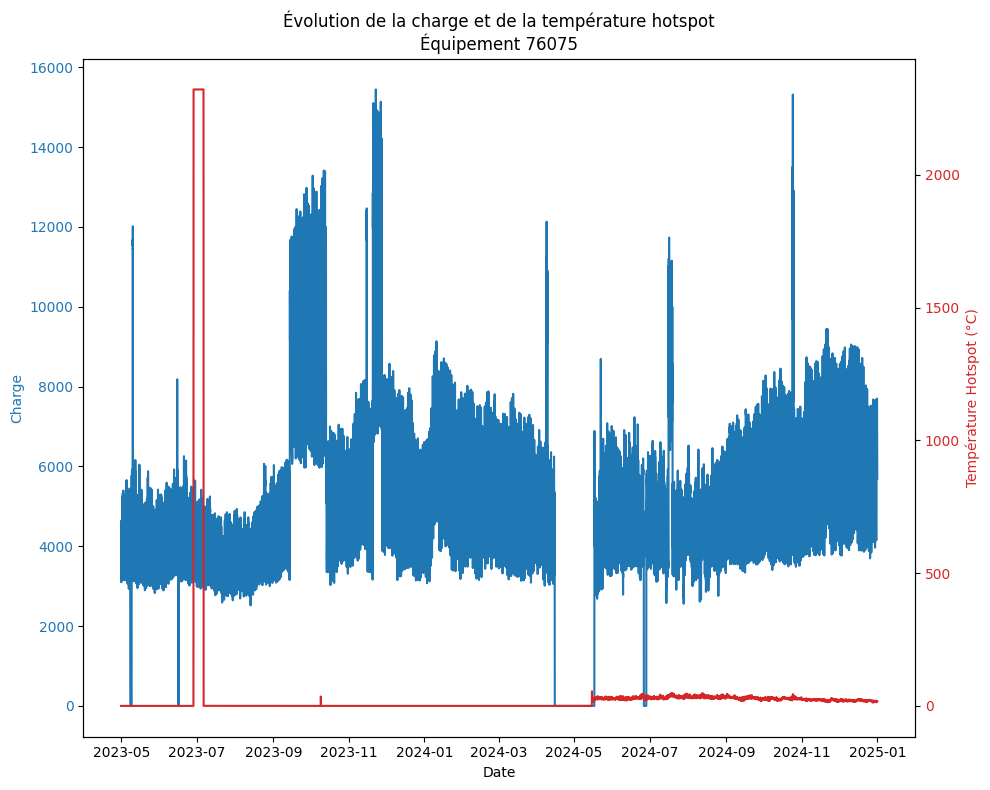

In [63]:
# Choisir un équipement
equipement = 76075

# Filtrer les données pour l'équipement sélectionné
df_filtre = df[df['equipmentId'] == equipement]
df_filtre = df_filtre.dropna()

# Convertir la colonne dateTime en datetime
df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])

# Créer une figure avec deux axes y
fig, ax1 = plt.subplots(figsize=(10, 8))

# Premier axe pour la charge
ax1.set_xlabel('Date')
ax1.set_ylabel('Charge', color='tab:blue')
ax1.plot(df_filtre['dateTime'], df_filtre['load'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Deuxième axe pour la température hotspot
ax2 = ax1.twinx()
ax2.set_ylabel('Température Hotspot (°C)', color='tab:red')
ax2.plot(df_filtre['dateTime'], df_filtre['hotspotTemperature'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Titre et rotation des étiquettes de l'axe x
plt.title(f"Évolution de la charge et de la température hotspot\nÉquipement {equipement}")
plt.xticks(rotation=45)

# Ajuster la disposition
fig.tight_layout()
plt.show()


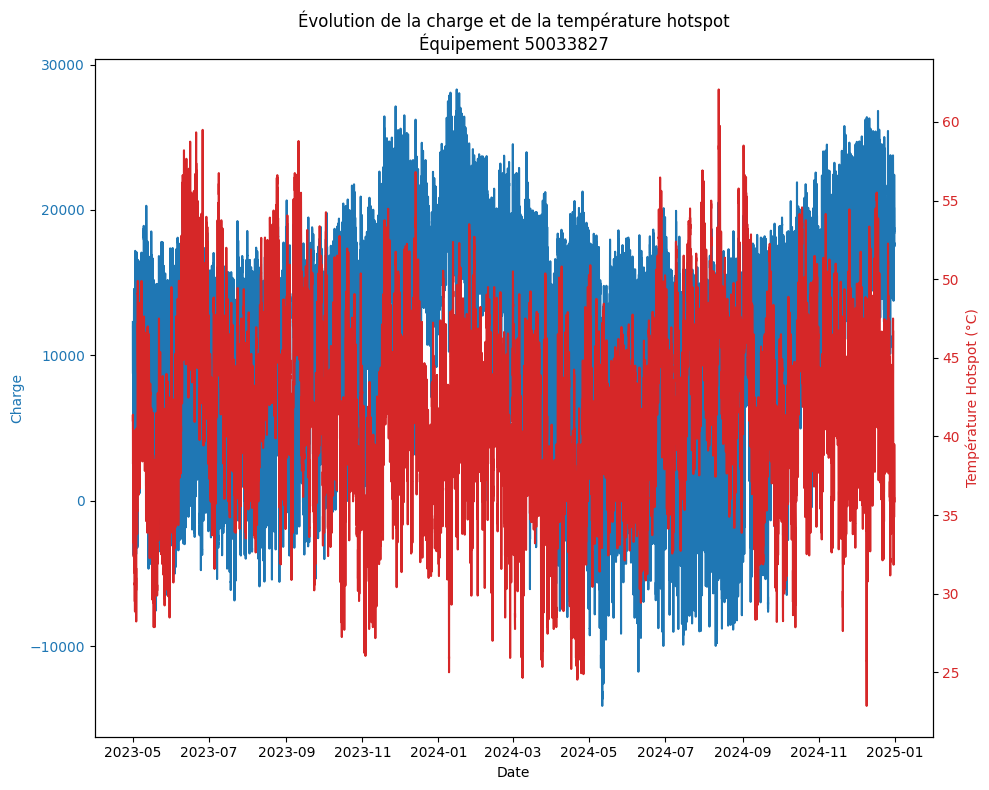

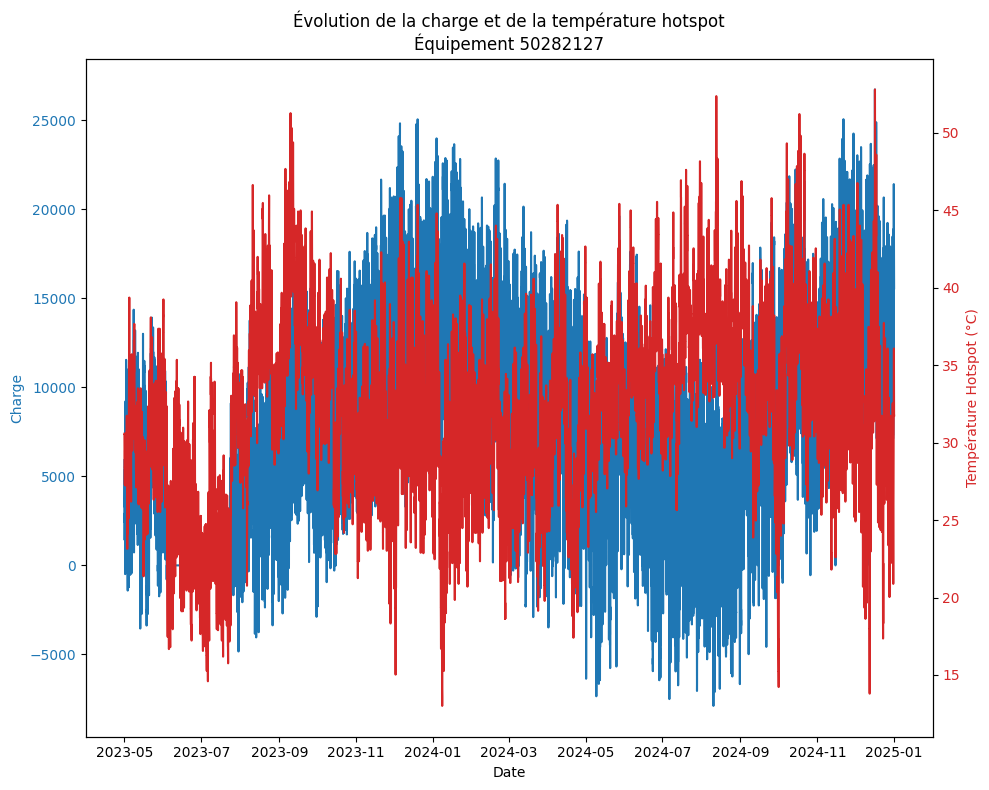

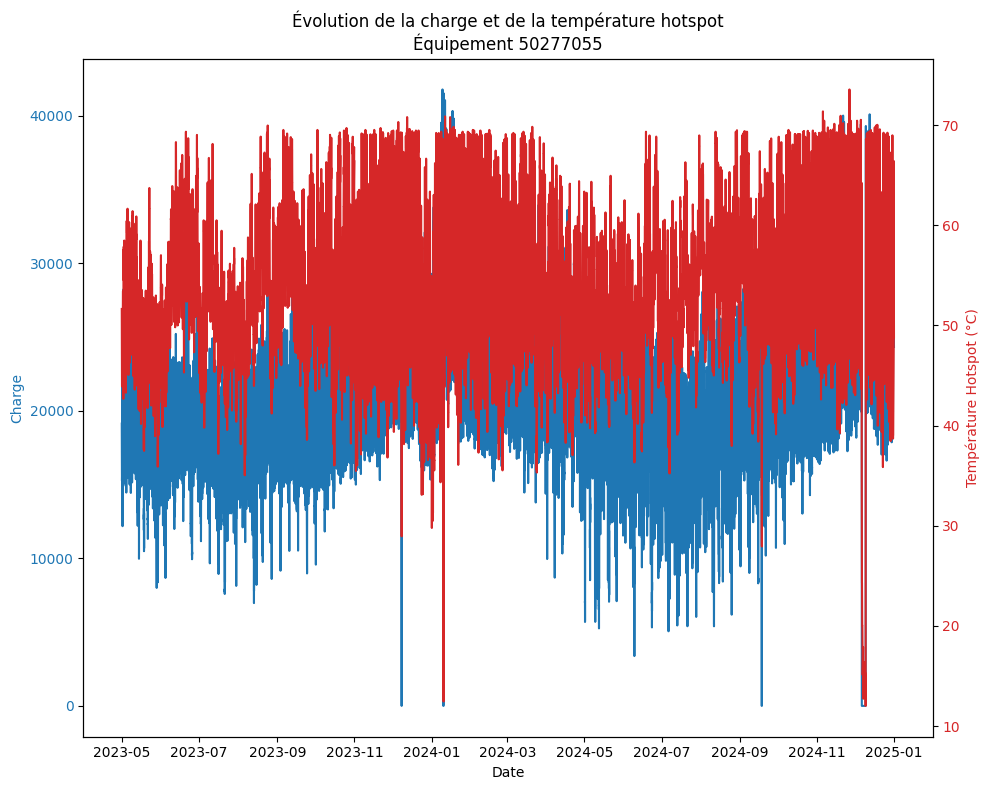

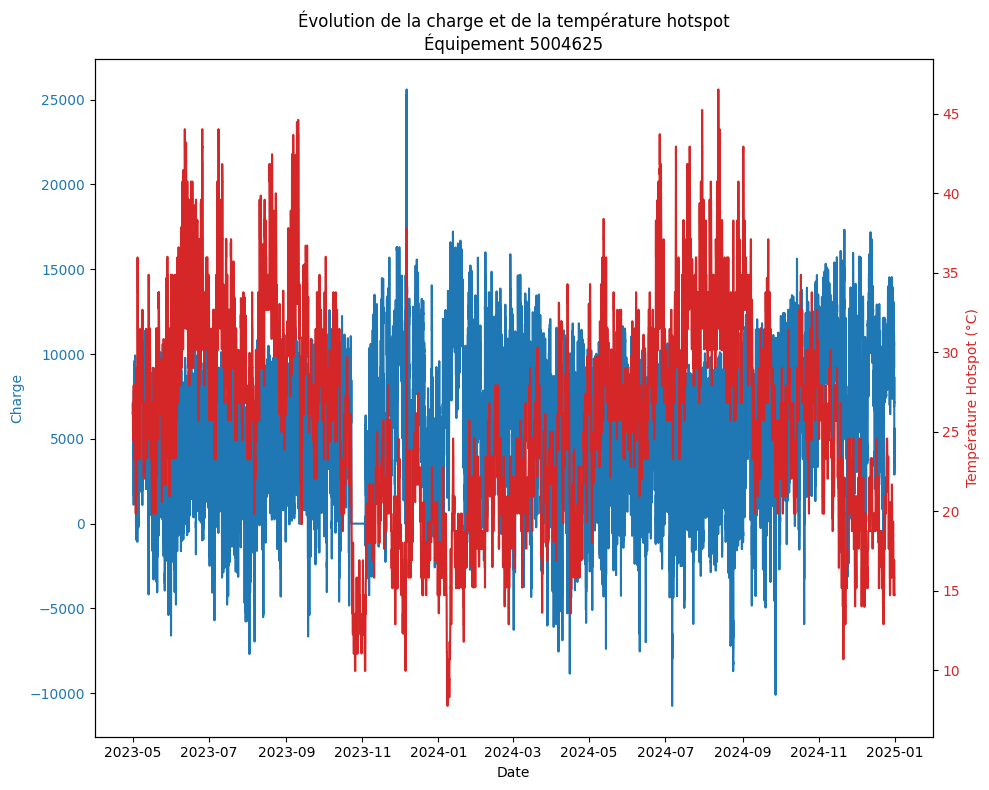

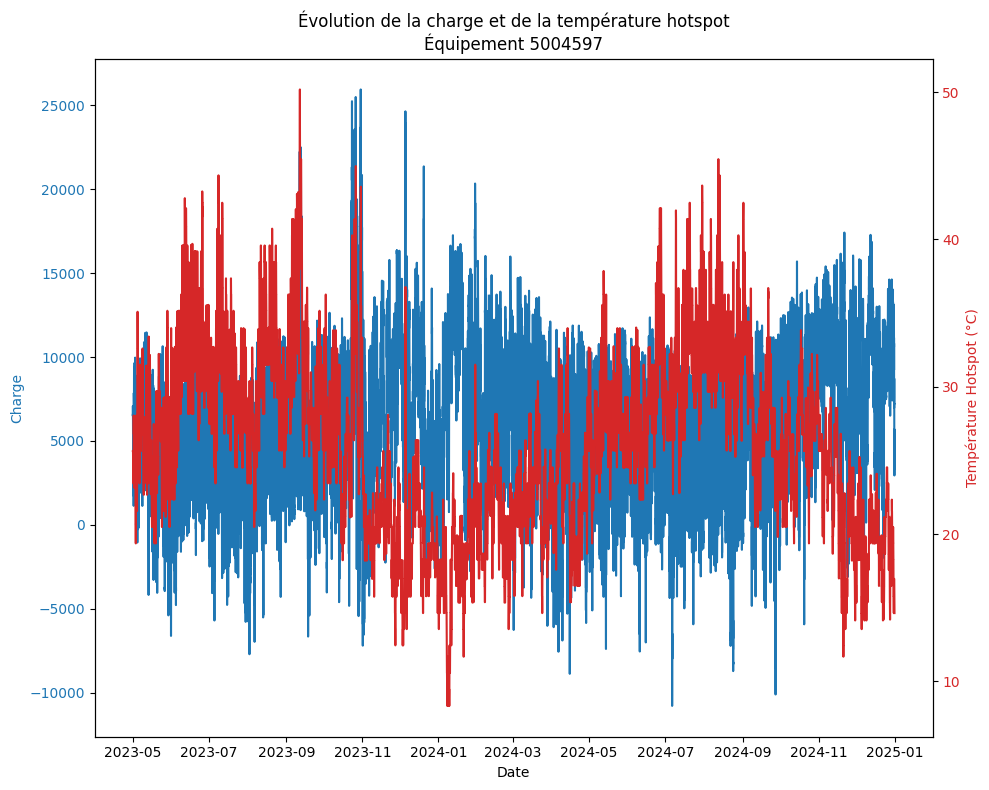

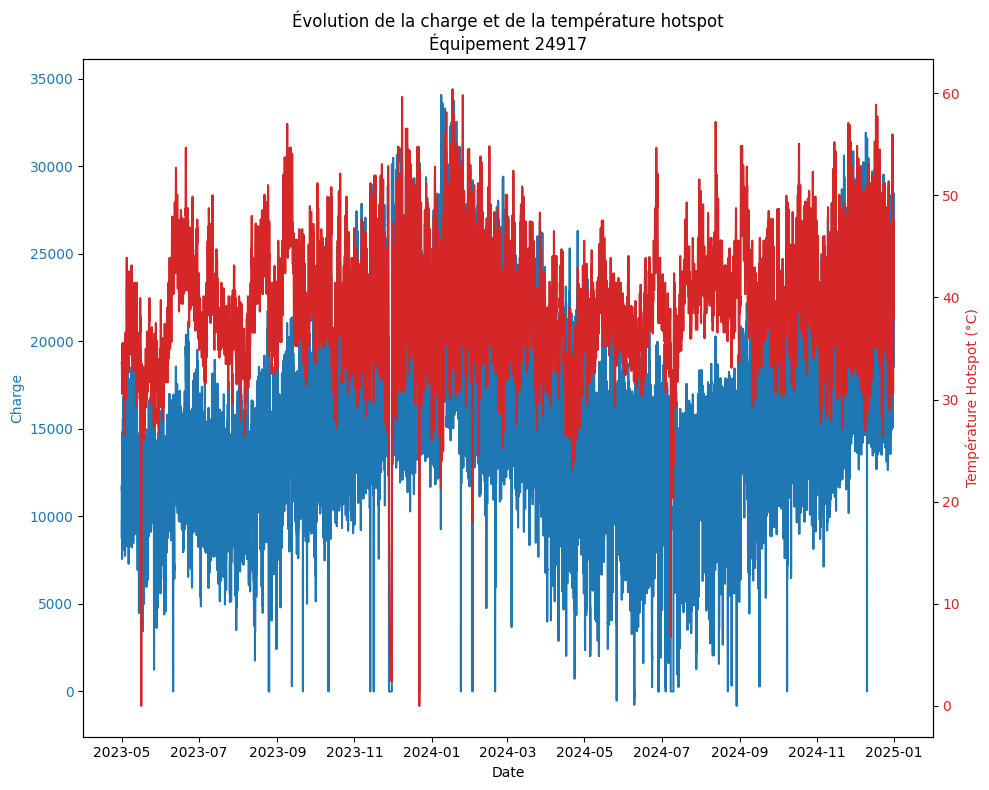

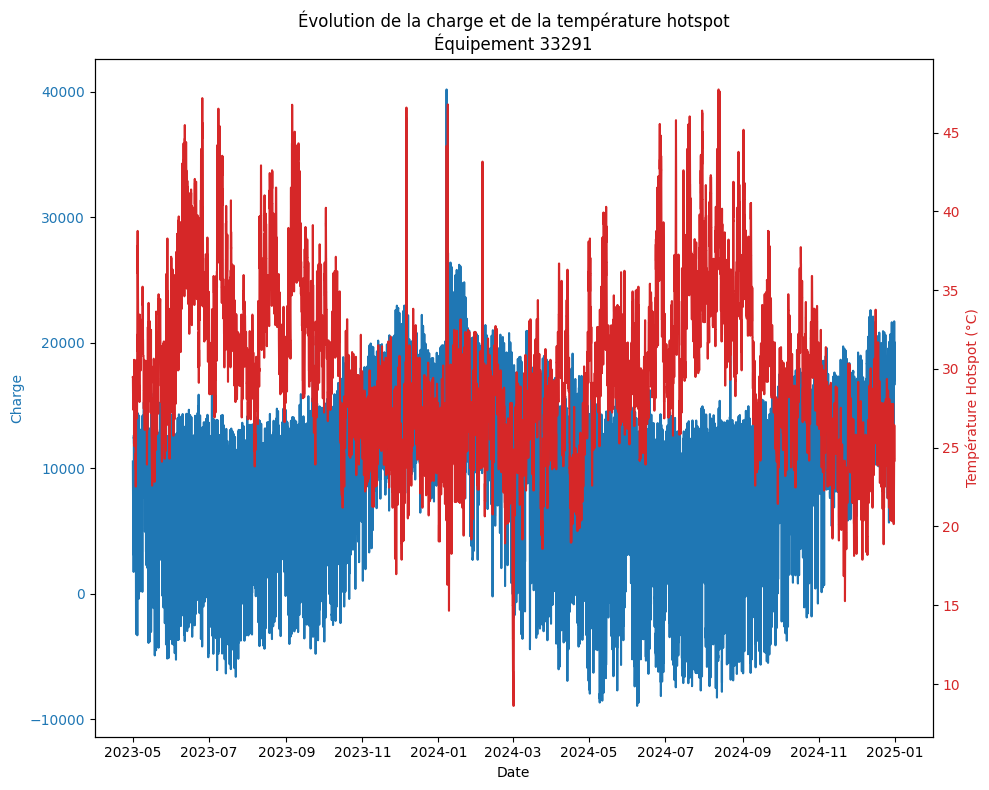

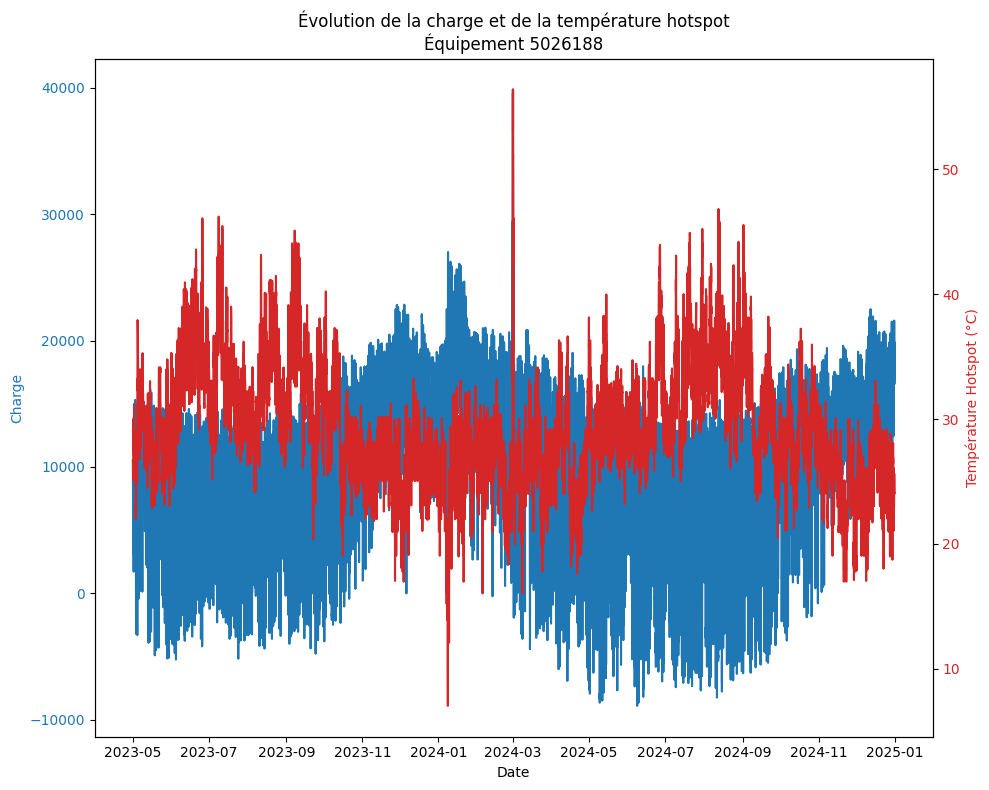

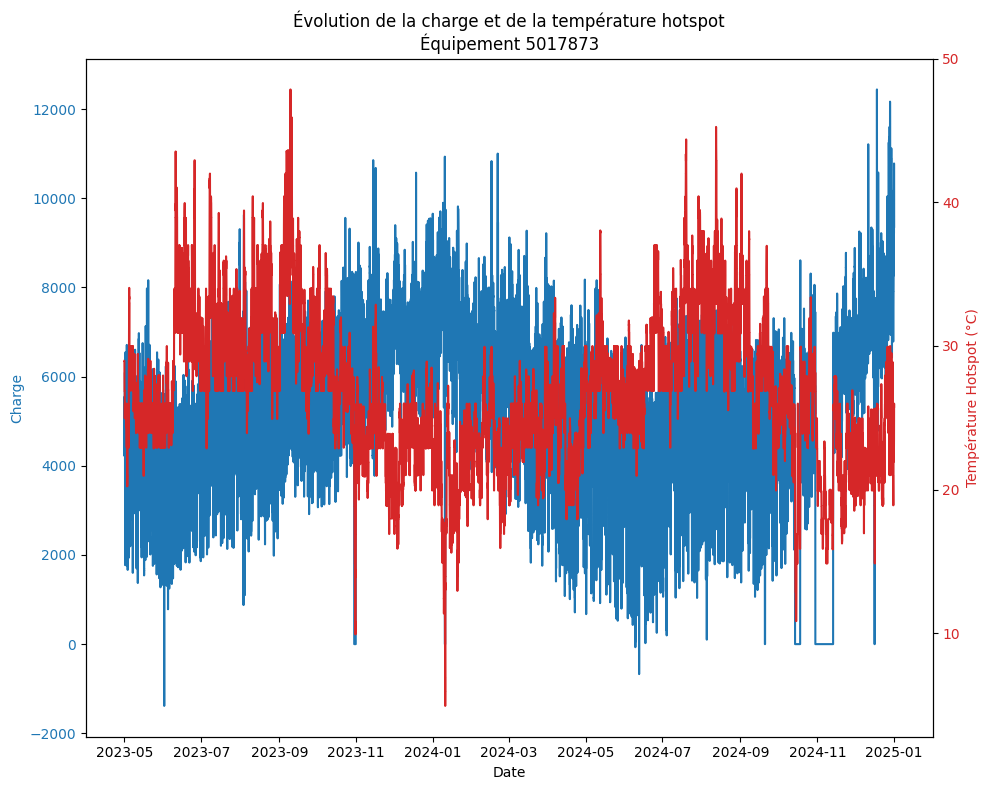

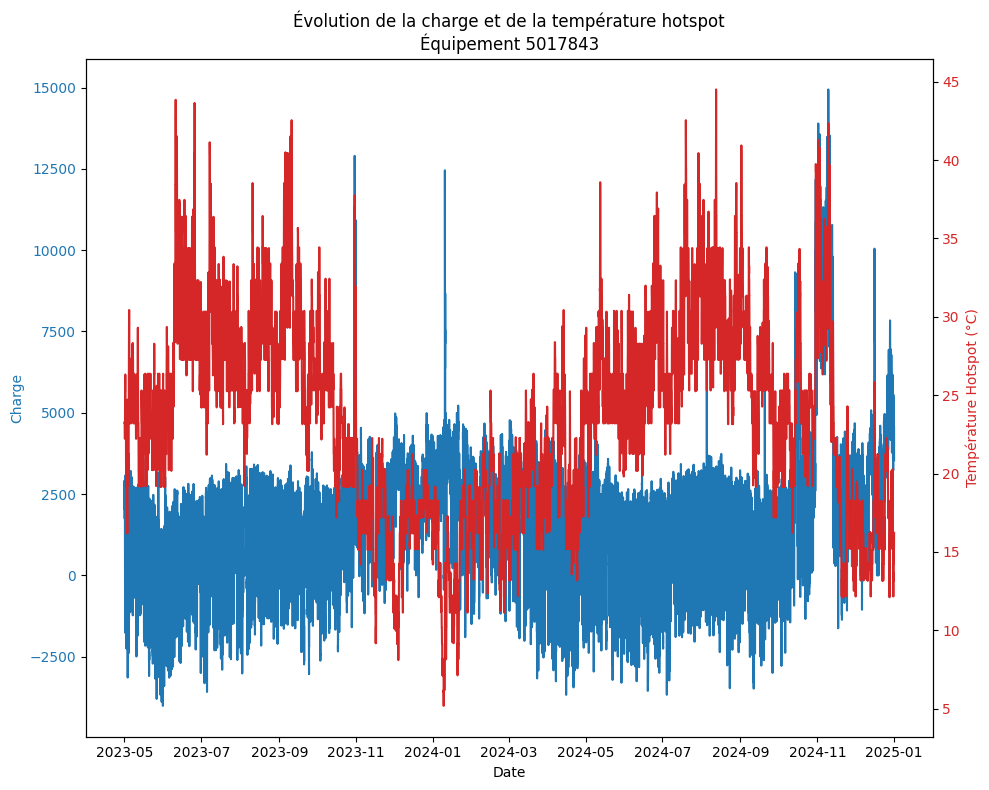

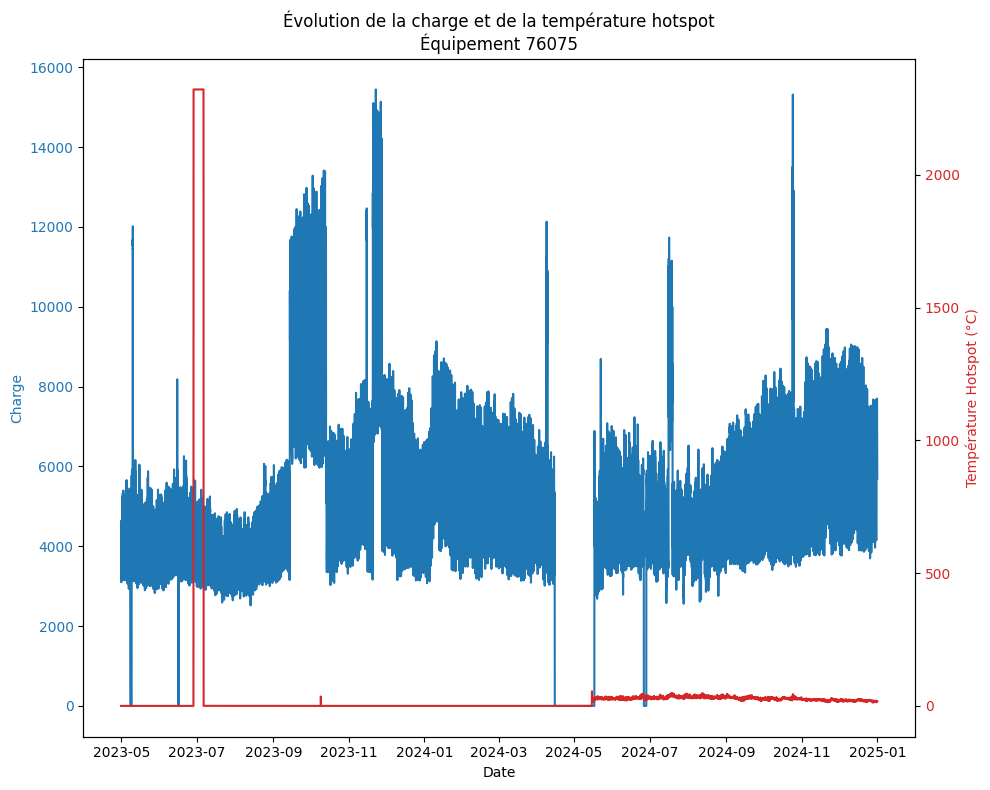

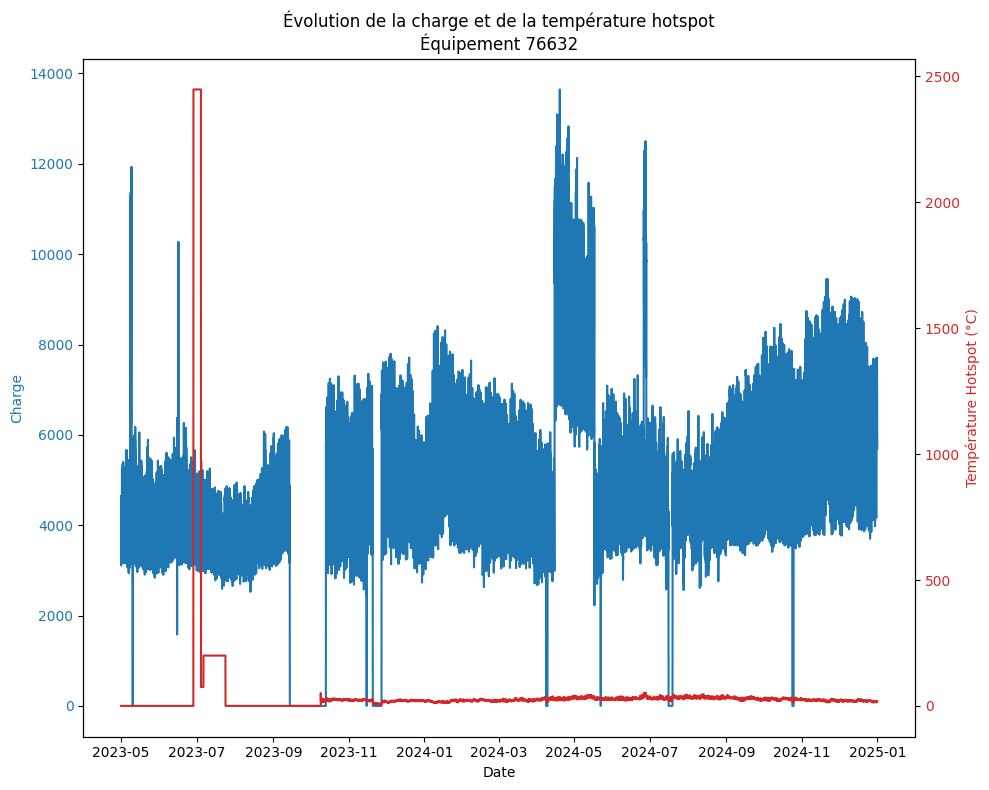

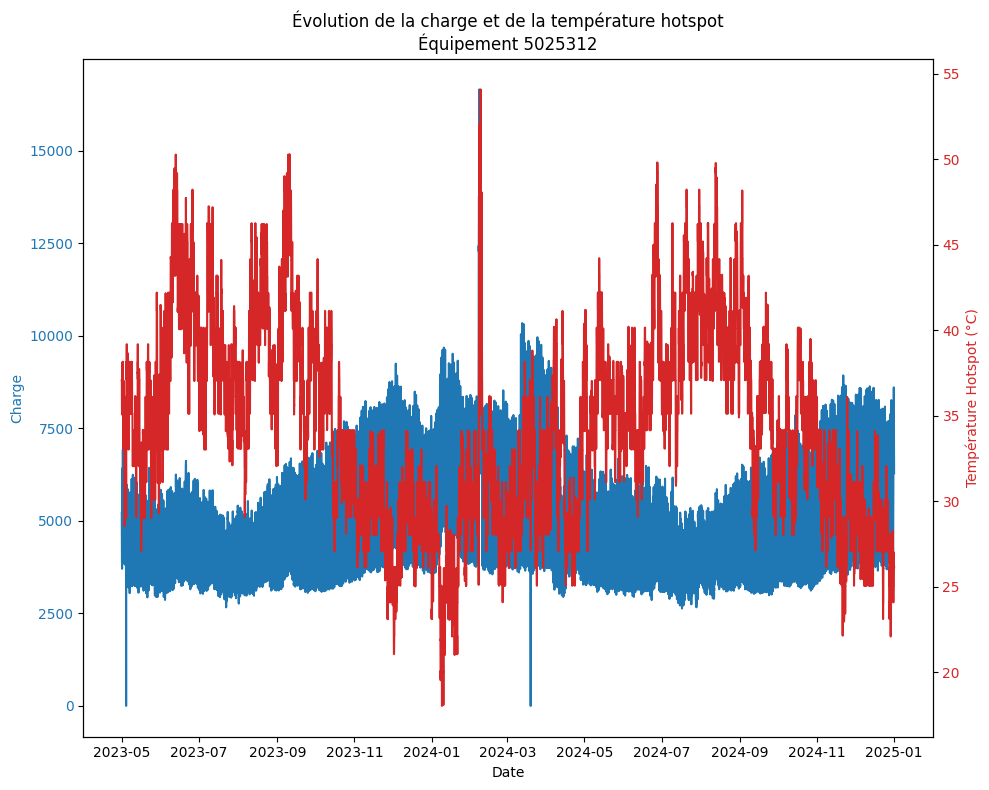

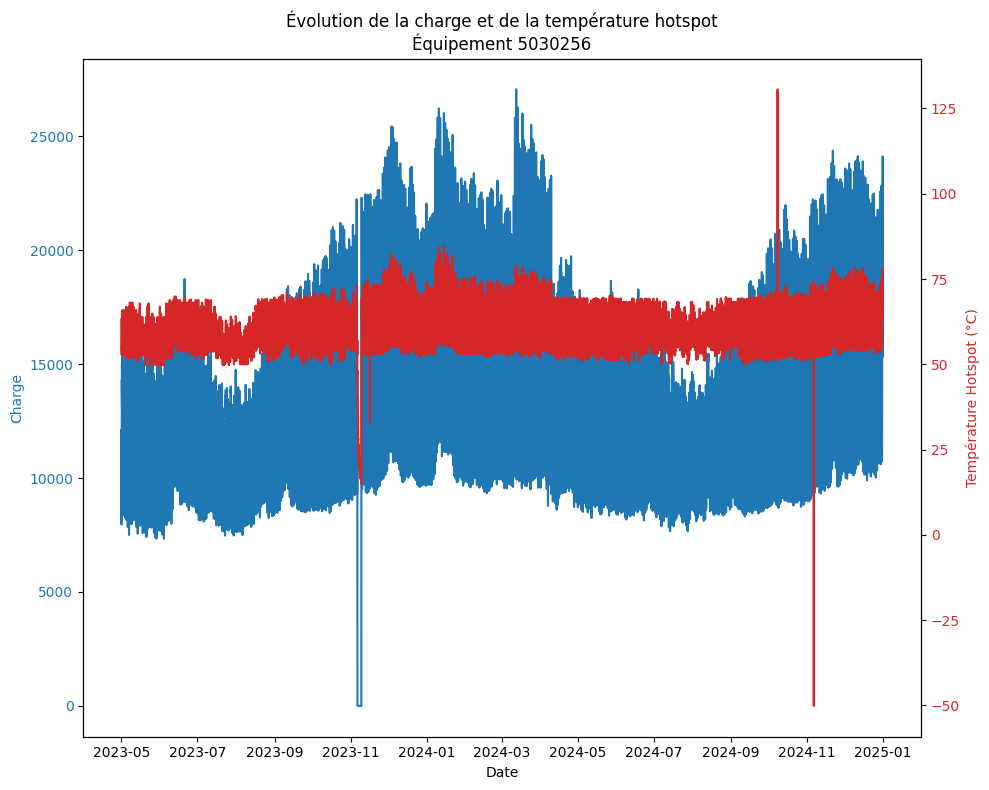

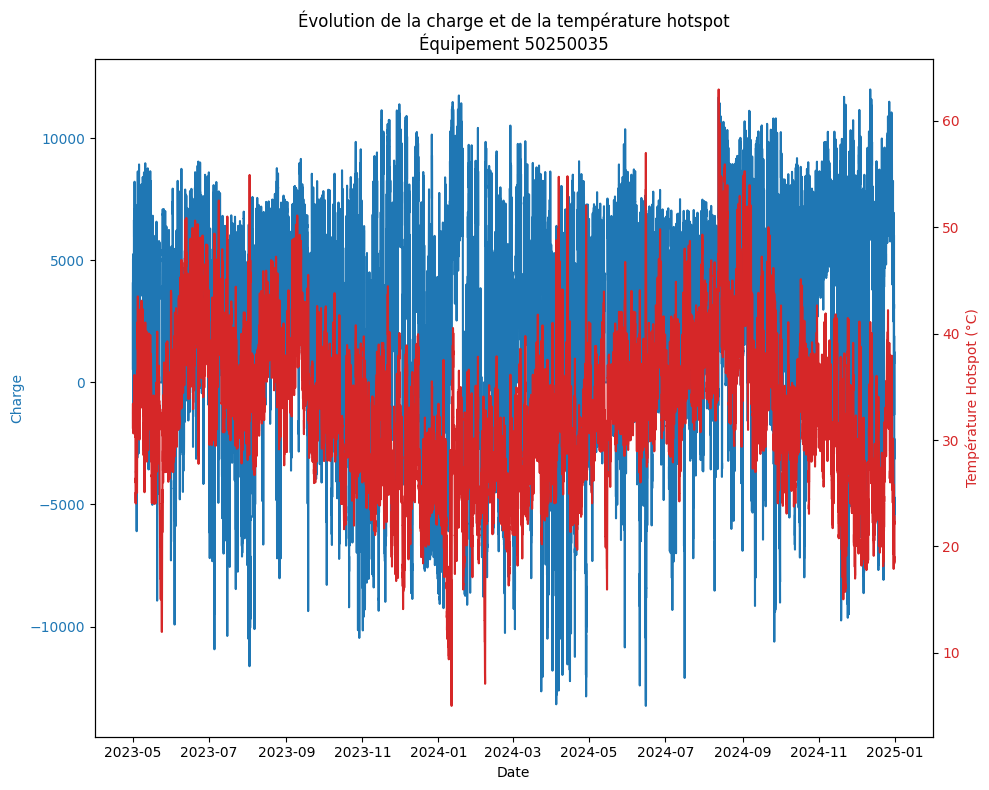

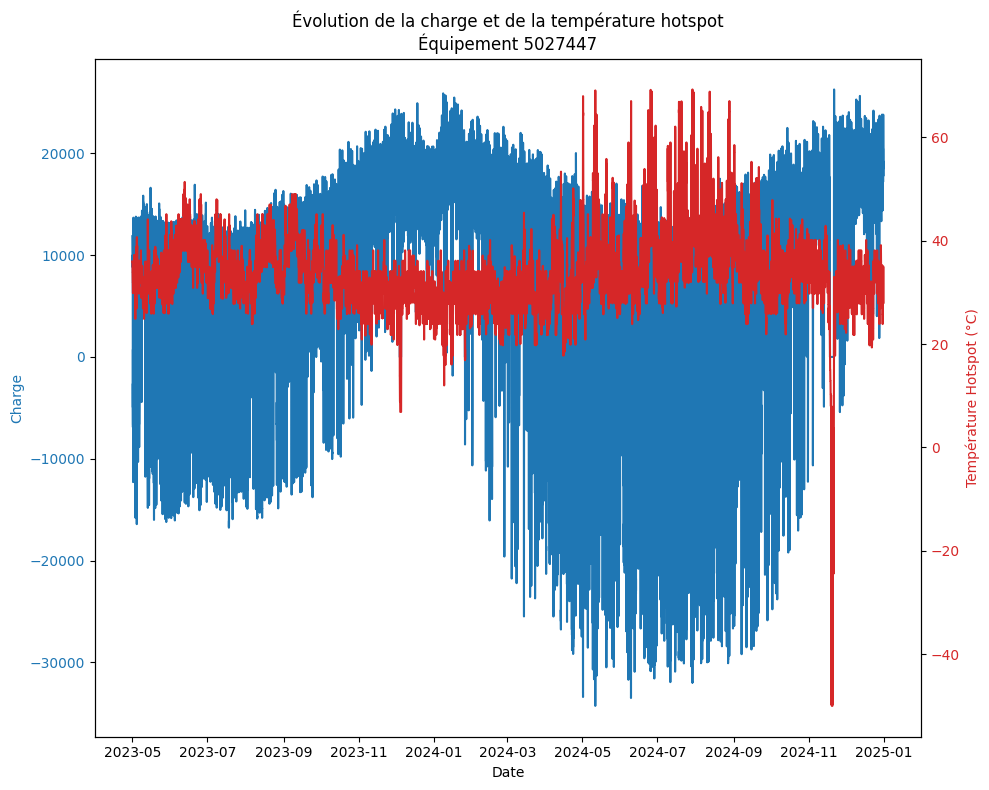

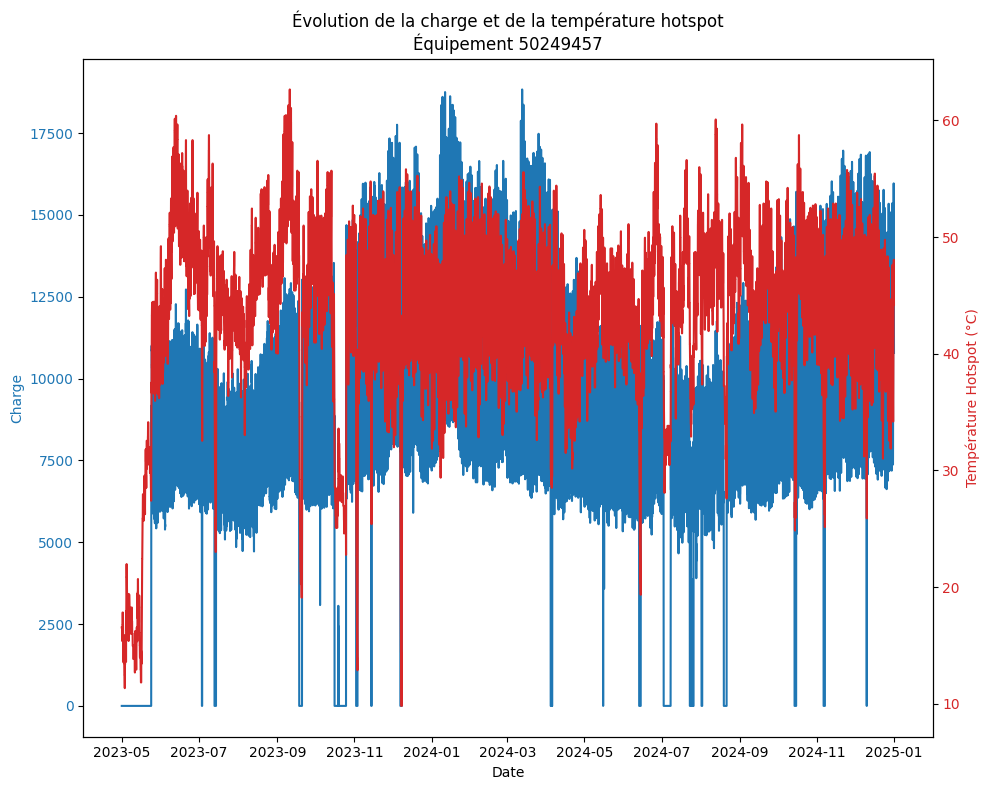

In [64]:

for equipement in df['equipmentId'].unique():
    # Filtrer les données pour l'équipement sélectionné
    df_filtre = df[df['equipmentId'] == equipement]
    df_filtre = df_filtre.dropna()

    # Convertir la colonne dateTime en datetime
    df_filtre['dateTime'] = pd.to_datetime(df_filtre['dateTime'])

    # Créer une figure avec deux axes y
    fig, ax1 = plt.subplots(figsize=(10, 8))

    # Premier axe pour la charge
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Charge', color='tab:blue')
    ax1.plot(df_filtre['dateTime'], df_filtre['load'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Deuxième axe pour la température hotspot
    ax2 = ax1.twinx()
    ax2.set_ylabel('Température Hotspot (°C)', color='tab:red')
    ax2.plot(df_filtre['dateTime'], df_filtre['hotspotTemperature'], color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Titre et rotation des étiquettes de l'axe x
    plt.title(f"Évolution de la charge et de la température hotspot\nÉquipement {equipement}")
    plt.xticks(rotation=45)

    # Ajuster la disposition
    fig.tight_layout()
    plt.show()

In [57]:


df_filtre


,equipmentId,dateTime,load,hotspotTemperature
836212,5030256,2023-04-30T22:00:00,12100.87,63.16
836213,5030256,2023-04-30T22:15:00,11778.65,61.75
836214,5030256,2023-04-30T22:30:00,11461.16,61.75
836215,5030256,2023-04-30T22:45:00,10995.12,61.75
836216,5030256,2023-04-30T23:00:00,10723.65,61.75
...,...,...,...,...
894867,5030256,2024-12-31T21:45:00,16714.90,67.94
894868,5030256,2024-12-31T22:00:00,16341.60,66.25
894869,5030256,2024-12-31T22:15:00,16012.13,65.98
894870,5030256,2024-12-31T22:30:00,15719.93,65.25


In [ ]:
df